In [1]:
import numpy as np
import pandas as pd
import time
import os
import PIL
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

In [2]:
import torch
from torch import nn, optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [3]:
path = os.path.join('data', 'train_sets', '*', '*.jpg')
fname = glob(path)

fname

['data/train_sets/beras_kutah/38.jpg',
 'data/train_sets/beras_kutah/101.jpg',
 'data/train_sets/beras_kutah/88.jpg',
 'data/train_sets/beras_kutah/132.jpg',
 'data/train_sets/beras_kutah/80.jpg',
 'data/train_sets/beras_kutah/10.jpg',
 'data/train_sets/beras_kutah/122.jpg',
 'data/train_sets/beras_kutah/26.jpg',
 'data/train_sets/beras_kutah/21.jpg',
 'data/train_sets/beras_kutah/74.jpg',
 'data/train_sets/beras_kutah/99.jpg',
 'data/train_sets/beras_kutah/16.jpg',
 'data/train_sets/beras_kutah/37.jpg',
 'data/train_sets/beras_kutah/129.jpg',
 'data/train_sets/beras_kutah/57.jpg',
 'data/train_sets/beras_kutah/39.jpg',
 'data/train_sets/beras_kutah/76.jpg',
 'data/train_sets/beras_kutah/45.jpg',
 'data/train_sets/beras_kutah/66.jpg',
 'data/train_sets/beras_kutah/75.jpg',
 'data/train_sets/beras_kutah/96.jpg',
 'data/train_sets/beras_kutah/70.jpg',
 'data/train_sets/beras_kutah/69.jpg',
 'data/train_sets/beras_kutah/81.jpg',
 'data/train_sets/beras_kutah/34.jpg',
 'data/train_sets/ber

In [4]:
# label = []
# for fn in fname :
#     fn = fn.split("/")[2]
#     label.append(fn)

In [5]:
label = [fn.split("/")[-2] for fn in fname]
label

['beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_kutah',
 'beras_

In [6]:
images = [fn.split("/")[-1] for fn in fname]
images

['38.jpg',
 '101.jpg',
 '88.jpg',
 '132.jpg',
 '80.jpg',
 '10.jpg',
 '122.jpg',
 '26.jpg',
 '21.jpg',
 '74.jpg',
 '99.jpg',
 '16.jpg',
 '37.jpg',
 '129.jpg',
 '57.jpg',
 '39.jpg',
 '76.jpg',
 '45.jpg',
 '66.jpg',
 '75.jpg',
 '96.jpg',
 '70.jpg',
 '69.jpg',
 '81.jpg',
 '34.jpg',
 '59.jpg',
 '62.jpg',
 '24.jpg',
 '123.jpg',
 '91.jpg',
 '58.jpg',
 '43.jpg',
 '14.jpg',
 '103.jpg',
 '9.jpg',
 '31.jpg',
 '41.jpg',
 '112.jpg',
 '33.jpg',
 '17.jpg',
 '47.jpg',
 '72.jpg',
 '32.jpg',
 '89.jpg',
 '84.jpg',
 '130.jpg',
 '71.jpg',
 '65.jpg',
 '104.jpg',
 '77.jpg',
 '29.jpg',
 '124.jpg',
 '79.jpg',
 '85.jpg',
 '115.jpg',
 '73.jpg',
 '7.jpg',
 '46.jpg',
 '78.jpg',
 '98.jpg',
 '64.jpg',
 '35.jpg',
 '128.jpg',
 '60.jpg',
 '105.jpg',
 '107.jpg',
 '134.jpg',
 '94.jpg',
 '87.jpg',
 '52.jpg',
 '42.jpg',
 '12.jpg',
 '53.jpg',
 '68.jpg',
 '55.jpg',
 '126.jpg',
 '120.jpg',
 '82.jpg',
 '48.jpg',
 '44.jpg',
 '108.jpg',
 '3.jpg',
 '4.jpg',
 '51.jpg',
 '90.jpg',
 '2.jpg',
 '40.jpg',
 '100.jpg',
 '131.jpg',
 '93.j

In [7]:
labels = np.unique(label)
ints = np.arange(0, len(labels))
dicts = dict(zip(labels, ints))

dicts

{'beras_kutah': 0,
 'gajah_oling': 1,
 'gedegan': 2,
 'kopi_pecah': 3,
 'moto_pitik': 4,
 'paras_gempal': 5,
 'sisikan': 6}

In [8]:
df_batik = pd.DataFrame({"image_id":images,"label":label})

#check image files
index = []
path = path[:-7]
for i in range(len(df_batik)) :
    try :
        Image.open(path + str(df_batik["label"][i]) + '/' + str(df_batik["image_id"][i]))
        pass
    except PIL.UnidentifiedImageError:
        index.append(i)

df = df_batik.drop(index)
df.head()

,image_id,label
0,38.jpg,beras_kutah
1,101.jpg,beras_kutah
2,88.jpg,beras_kutah
3,132.jpg,beras_kutah
4,80.jpg,beras_kutah


## Plot images

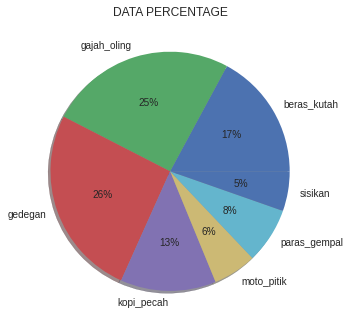

In [9]:
target, count = np.unique(df['label'], return_counts=True)
precentange = [x / np.sum(count) for x in count]
plt.style.use('seaborn')
plt.pie(precentange, labels = target,  autopct='%1.f%%', shadow=True)
plt.title('DATA PERCENTAGE')
plt.show()

## Datasets dan dataloader

In [10]:
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

In [11]:
class Batik(Dataset) :
    def __init__(self, x, y, path, map_label = dicts, transform=None) :
        super().__init__()
        self.X = x
        self.y = y
        self.path = path
        self.map_label = map_label
        self.transform = transform
    
    def __getitem__(self, idx) :
        img = Image.open(path + str(self.y[idx]) + '/' + str(self.X[idx])).convert("RGB")
        label = self.map_label[self.y[idx]]
        
        if self.transform is not None :
            img = self.transform(img)
        
        return img, label

    
    def __len__(self) :
        return self.X.shape[0]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df["image_id"].values
y = df["label"].values

# train data, validation data
X_train, X_val, y_train, y_val = train_test_split(X, y , test_size=0.3, shuffle=True, 
                                                          stratify=y, random_state=42)


len(X_train), len(X_val)

(417, 179)

In [14]:
#DATALOADER
batch = 32
crop_size = 224

#pipeline data augmentation 
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(crop_size, scale=(0.8, 1.0)),
    transforms.RandomVerticalFlip(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(0, shear=(10)),
    transforms.RandomRotation(20),
    transforms.ToTensor()
])

val_transform = transforms.Compose([
    transforms.Resize(crop_size + 7),
    transforms.CenterCrop(crop_size),
    transforms.ToTensor()
])

train_set = Batik(X_train, y_train, path, transform=train_transform)
val_set = Batik(X_val, y_val, path, transform=val_transform)

# use pytorch for dataloader
train_loader = DataLoader(train_set, batch_size=batch, shuffle=True, 
                          num_workers=4, pin_memory=True)
val_loader = DataLoader(val_set, batch_size=batch, shuffle=True, 
                        num_workers=4, pin_memory=True)

## error

In [15]:
# feature, target = next(iter(train_loader))
# feature.shape

### Cek 

In [16]:
import random

gajah_oling


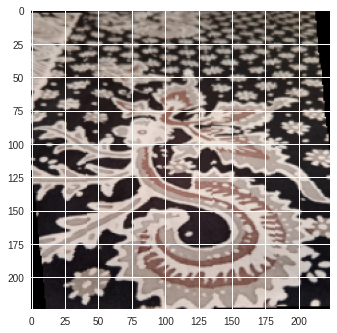

In [17]:
int_label = dict(zip(ints, labels))


img, label = train_set[random.randint(0, len(X_train))]
plt.imshow(img.permute(1,2,0));
print(int_label[label])

## model architecture

In [18]:
# class MyCustomModel(nn.Module) :
#     def __init__(self) :
#         super().__init__()
#         self.conv = nn.Sequential(
#             nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Flatten()
#         )
#         self.fc = nn.Sequential(
#             nn.Linear(in_features=2048, out_features=1024),
#             nn.ReLU(),
#             nn.Linear(in_features=1024, out_features=7),
#             nn.LogSoftmax(1)
#         )
#     def forward(self, x) :
#         x = self.conv(x)
#         x = self.fc(x)
#         return x
        

### Early-Stopping Class

In [19]:
# class EarlyStopping() :
#     #    Early stops the training if validation loss doesn't improve after a given patience.
#     def __init__(self, patience=5, delta=0, verbose= False, path='checkpoint.pt', trace_func=print) :
        
#         #Args:
#         #   patience (int): How long to wait after last time validation loss improved.
#         #                    Default: 7
#         #    verbose (bool): If True, prints a message for each validation loss improvement. 
#         #                    Default: False
#         #    delta (float): Minimum change in the monitored quantity to qualify as an improvement.
#         #                    Default: 0
#         #    path (str): Path for the checkpoint to be saved to.
#         #                    Default: 'checkpoint.pt'
#         #    trace_func (function): trace print function.
#         #                    Default: print            
                
#         self.patience = patience
#         self.verbose = verbose
#         self.counter = 0
#         self.best_score = None
#         self.early_stop = False
#         self.val_loss_min = np.Inf
#         self.delta = delta
#         self.path = path
#         self.trace_func = trace_func
        
#     def __call__(self, val_loss, model) :
        
#         score = -val_loss

#         if self.best_score is None :
#             self.best_score = score
#             self.save_checkpoint(val_loss, model)
            
#         elif score < self.best_score + self.delta :
#             self.counter += 1
#             self.trace_func(f'\n |EarlyStopping counter: {self.counter} out of {self.patience}|')
            
#             # early stopping
#             if self.counter >= self.patience :
#                 self.early_stop = True
        
#         else :
#             self.best_score = score
#             self.save_checkpoint(val_loss, model)
#             self.counter = 0
        
#     #save checkpoint
#     def save_checkpoint (self, val_loss, model) :
#         if self.verbose:
#             self.trace_func(f'\nValidation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
#         torch.save(model.state_dict(), self.path)
#         self.val_loss_min = val_loss

## Training preperation

In [20]:
from torch import optim
from tqdm.auto import tqdm

In [21]:
from Tools.MyModels import CustomResnet152

In [22]:
lr = 0.001

model = CustomResnet152().to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr= lr)

In [23]:
# print(model)

In [24]:
#function looping
def looping(mode, dataset, dataloader, model, criterion, optimizer, device) :
    if mode =="train" :
        model.train()
    
    elif mode =="val" or mode == "test":
        model.eval()
    
    cost = correct = 0
    for feature, target in tqdm(dataloader, desc=mode.title()) :
        feature, target = feature.to(device), target.to(device)
        output = model(feature)
        loss = criterion(output, target)
        
        if mode =="train" :
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
        correct += (output.argmax(1) == target).sum().item()
        
    cost = cost / len(dataset)
    acc = correct / len(dataset)
    
    return cost, acc

In [25]:
# #test

# epochs = 12
# train_cost, val_cost = [], []
# train_acc, val_acc = [], []
# for i in range (epochs) :
#     since = time.time()
    
#     # training for data train
#     cost, acc = looping("train", train_set, train_loader, model, criterion, optimizer, device)
#     train_cost.append(cost)
#     train_acc.append(acc)
    
#     # training for data val
#     with torch.no_grad() :
#         cost, acc = looping("val", val_set, val_loader, model, criterion, optimizer, device)
#         val_cost.append(cost)
#         val_acc.append(acc)
    
#     print("Epochs : {}/{} | ".format(i+1, epochs),
#           "train_cost : {} | ".format(train_cost[-1]),
#           "val_cost : {} | ".format(val_cost[-1]),
#           "train_acc : {} | ".format(train_acc[-1]),
#           "val_cost : {} | ".format(val_cost[-1]),
#           'time {:.3f} s'.format(time.time() - since)
#          )
    

In [26]:
from Tools.StoppingTools import EarlyStopping

In [27]:
# test - 2

train_cost, val_cost = [], []
train_acc, val_acc = [], []

#object early_stopping
early_stopping = EarlyStopping(patience=7, verbose=True)

epoch = 1
while True :
    since = time.time()
    
    # training for data train
    cost, acc = looping("train", train_set, train_loader, model, criterion, optimizer, device)
    train_cost.append(cost)
    train_acc.append(acc)
    
    # training for data val
    with torch.no_grad() :
        cost, acc = looping("val", val_set, val_loader, model, criterion, optimizer, device)
        val_cost.append(cost)
        val_acc.append(acc)
        
    print("Epochs : {} | ".format(epoch),
          "train_cost : {} | ".format(train_cost[-1]),
          "val_cost : {} | ".format(val_cost[-1]),
          "train_acc : {} | ".format(train_acc[-1]),
          "val_acc : {} | ".format(val_acc[-1]),
          'time {:.3f} s'.format(time.time() - since)
         )
    epoch+=1
    
    early_stopping(val_cost[-1], model)
    #ealry stopping
    if early_stopping.early_stop:
            print("Early stopping")
            break
    


Epochs : 1 |  train_cost : 1.546271479101204 |  val_cost : 1.198972440964683 |  train_acc : 0.48201438848920863 |  val_acc : 0.6536312849162011 |  time 513.470 s

Validation loss decreased (inf --> 1.198972).  Saving model ...



Epochs : 2 |  train_cost : 0.9587263111873783 |  val_cost : 0.8189821020184949 |  train_acc : 0.6522781774580336 |  val_acc : 0.7486033519553073 |  time 526.222 s

Validation loss decreased (1.198972 --> 0.818982).  Saving model ...



Epochs : 3 |  train_cost : 0.6380144020350431 |  val_cost : 0.7121131952914446 |  train_acc : 0.8225419664268585 |  val_acc : 0.7821229050279329 |  time 578.470 s

Validation loss decreased (0.818982 --> 0.712113).  Saving model ...


KeyboardInterrupt: 

In [ ]:
#Load Model checkpoint
model.load_state_dict(torch.load('checkpoint.pt'))

## Predict (Test the Trained Network)

In [ ]:
# make testing data

# test_set = datasets.ImageFolder('data/test_train/', transform=val_transform)
# test_loader = DataLoader(test_set, batch_size=64, shuffle=True, 
#                         num_workers=4, pin_memory=True)

In [ ]:
# for i in range(test_loader.batch_size):
#     with torch.no_grad :
#         model.eval()
#         for feature, target in test_loader :
#             feature, target = feature.to(device), target.to(device)
#             output = model(feature)
#             preds = output.argmax[1]
# preds

In [ ]:
len(test_loader)